# 라이브러리
- numpy(수학 계산)
- pandas(행렬 계산)
- matplotlib(데이터 시각화)
- sklearn(머신러닝을 위한 가장 강력한 라이브러리!!)

In [72]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # 3D를 구현하기 위해 import, matplotlib 3.2 버전부터 필요없음 (형식상 쓴거임)
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline 
# 실행한 line에서 표를 볼수 있도록, plt.show()가 필요없음

 # 데이터 로드

In [73]:
bst = load_boston()
bstDF = pd.DataFrame(bst.data, columns=bst.feature_names)
print(bstDF.shape) # (row, column) 

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [74]:
bstDF.head() # 기본적으로는 5개의 행을 제공

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


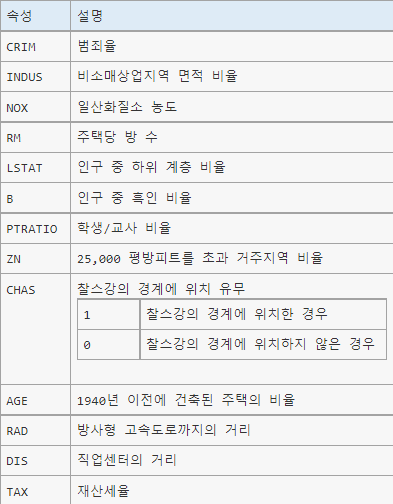

In [75]:
print(bstDF.keys())
print(bst.keys()) # target데이터가 y 값 numpy 배열 type

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


# 독립변수 1 
- RM, PIRATIO



In [76]:
bstDF1 = bstDF[['RM', 'PTRATIO']]
print(bstDF1.shape)
bstDF1.head()

(506, 2)


,RM,PTRATIO
0,6.575,15.3
1,6.421,17.8
2,7.185,17.8
3,6.998,18.7
4,7.147,18.7


# 독립변수 2
- CRIM, NOX

In [77]:
bstDF2 = bstDF[['CRIM', 'NOX']]
print(bstDF2.shape)
bstDF2.head()

(506, 2)


,CRIM,NOX
0,0.00632,0.538
1,0.02731,0.469
2,0.02729,0.469
3,0.03237,0.458
4,0.06905,0.458


# 독립변수 3
- LSTAT, RM

In [78]:
bstDF3 = bstDF[['LSTAT', 'RM']]
print(bstDF3.shape)
bstDF3.head()

(506, 2)


,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [79]:
x_data1 = bstDF1.to_numpy() # pandas 형태의 dataframe을 numpy 배열로 변환
x_data2 = bstDF2.to_numpy()
x_data3 = bstDF3.to_numpy()
y_data = bst.target

print(type(y_data))
print(x_data1[:5, :])
print(x_data2[:5, :])
print(x_data3[:5, :])
print(y_data[:5])

<class 'numpy.ndarray'>
[[ 6.575 15.3  ]
 [ 6.421 17.8  ]
 [ 7.185 17.8  ]
 [ 6.998 18.7  ]
 [ 7.147 18.7  ]]
[[0.00632 0.538  ]
 [0.02731 0.469  ]
 [0.02729 0.469  ]
 [0.03237 0.458  ]
 [0.06905 0.458  ]]
[[4.98  6.575]
 [9.14  6.421]
 [4.03  7.185]
 [2.94  6.998]
 [5.33  7.147]]
[24.  21.6 34.7 33.4 36.2]


# a(기울기), b(편향) 값 초기화
- [dtype=float32](https://appia.tistory.com/135)

In [80]:
slopes1 = np.zeros(x_data1.shape[1], dtype=np.float32) # x_data1.shape[1] = 2
b1 = 0. # 편향

slopes2 = np.zeros(x_data2.shape[1], dtype=np.float32) 
b2 = 0. # 편향

slopes3 = np.zeros(x_data3.shape[1], dtype=np.float32)
b3 = 0.

lr = 0.0001 # 학습률
epochs = 5001

print('기울기1 = {}, 편향1 = {}'.format(slopes1, b1))
print('기울기2 = {}, 편향2 = {}'.format(slopes2, b2))
print('기울기3 = {}, 편향3 = {}'.format(slopes3, b3))

기울기1 = [0. 0.], 편향1 = 0.0
기울기2 = [0. 0.], 편향2 = 0.0
기울기3 = [0. 0.], 편향3 = 0.0


# 변수의 값의 범위 조정(데이터 전처리)
- 전처리하는 이유는 0과1 사이로 값을 작게 만들어서 연산에 도움이 되도록 한다!!
- 지저분한 데이터를 다듬는 작업


In [81]:
from sklearn.preprocessing import MinMaxScaler # 전처리 모듈 

scaler1 = MinMaxScaler() # 데이터 전처리 class
scaler1.fit(x_data1) # 데이터 전처리 실행
x_data1 = scaler1.transform(x_data1) # 전처리한 데이터를 다시 x_data1 에 넣는다

#dir(MinMaxScaler)

scaler2 = MinMaxScaler()
scaler2.fit(x_data2)
x_data2 = scaler2.transform(x_data2) 

scaler3 = MinMaxScaler()
scaler3.fit(x_data3)
x_data3 = scaler3.transform(x_data3)

print('x_data1: \n {}'.format(x_data1))
print('x_data2: \n {}'.format(x_data2))
print('x_data3: \n {}'.format(x_data3))
print(type(x_data1))

x_data1: 
 [[0.57750527 0.28723404]
 [0.5479977  0.55319149]
 [0.6943859  0.55319149]
 ...
 [0.65433991 0.89361702]
 [0.61946733 0.89361702]
 [0.47307913 0.89361702]]
x_data2: 
 [[0.00000000e+00 3.14814815e-01]
 [2.35922539e-04 1.72839506e-01]
 [2.35697744e-04 1.72839506e-01]
 ...
 [6.11892474e-04 3.86831276e-01]
 [1.16072990e-03 3.86831276e-01]
 [4.61841693e-04 3.86831276e-01]]
x_data3: 
 [[0.08967991 0.57750527]
 [0.2044702  0.5479977 ]
 [0.06346578 0.6943859 ]
 ...
 [0.10789183 0.65433991]
 [0.13107064 0.61946733]
 [0.16970199 0.47307913]]
<class 'numpy.ndarray'>


# 여담
- transform()는 입력된 객체와 동일하게 인덱스된 객체를 반환한다.
- fit_transform은 train_set에서만 사용되고
- transform은 test_set에서 사용된다
- 이유는 fit_transform이 test_set으로부터 데이터를 학습할 수 있기 때문에

# x_data1 경사하강법
- 방법은 교재와 같습니다.
- a, b 값 초기화 하고 시작!! ***안하고 하면 a, b값이 늘어난 채로 시작함***

In [82]:

for i in range(epochs):
  y_pred = x_data1.dot(slopes1) + b1 # dot() 행렬계산 함수, a1 * x1 + a2 * x2 + b
  error = y_data - y_pred

  # list comprehension 으로 a1, a2 계산
  a_diff = np.array([-(2 / len(x_data1)) * sum(x_data1[:, i] * (error)) for i in range(len(slopes1))]) 
  b_diff = -(2 / len(x_data1) ) * sum(error)
  
  

  slopes1 -= lr * a_diff
  b1 -= lr * b_diff

  if i % 1000 == 0:
    print('epochs = {:04d}, 기울기 = {}, 절편 = {:04f}'.format(i, slopes1, b1))
    print('a1, a2 편미분 = {}, b1 편미분 = {} \n'.format(a_diff, b_diff))


epochs = 0000, 기울기 = [0.00252369 0.00259257], 절편 = 0.004507
a1, a2 편미분 = [-25.23690044 -25.92572954], b1 편미분 = -45.06561264822139 

epochs = 1000, 기울기 = [2.1758857 2.1692297], 절편 = 3.842844
a1, a2 편미분 = [-18.60500267 -17.86486693], b1 편미분 = -32.41696744797691 

epochs = 2000, 기울기 = [3.7853954 3.651196 ], 절편 = 6.606131
a1, a2 편미분 = [-13.85342276 -12.10218328], b1 편미분 = -23.361142812299658 

epochs = 3000, 기울기 = [4.9908566 4.643797 ], 절편 = 8.599701
a1, a2 편미분 = [-10.44778129  -7.98442005], b1 편미분 = -16.877011234551997 

epochs = 4000, 기울기 = [5.906653 5.286825], 절편 = 10.042109
a1, a2 편미분 = [-8.00558129 -5.04398966], b1 편미분 = -12.233672298941611 

epochs = 5000, 기울기 = [6.614661 5.680327], 절편 = 11.089796
a1, a2 편미분 = [-6.25304128 -2.94620694], b1 편미분 = -8.907967221592811 



# x_data2 경사하강법

In [83]:
for i in range(epochs):
  y_pred = x_data2.dot(slopes2) + b2
  error = y_data - y_pred
  a_diff = np.array([-(2 / len(x_data2)) * sum(x_data2[:, i] * (error)) for i in range(len(slopes2))])
  
  b_diff = -(2 / len(x_data2)) * sum(error)

  slopes2 -= lr * a_diff
  b2 -= lr * b_diff

  if i % 1000 == 0:
    print('epochs = {:04d}, 기울기 = {}, 절편 = {:04f}'.format(i, slopes2, b2))
    print('a1, a2 편미분 = {}, b2 편미분 = {} \n'.format(a_diff, b_diff))

epochs = 0000, 기울기 = [0.0001138 0.0013865], 절편 = 0.004507
a1, a2 편미분 = [ -1.13797208 -13.86499382], b2 편미분 = -45.06561264822139 

epochs = 1000, 기울기 = [0.09375402 1.2183955 ], 절편 = 4.046616
a1, a2 편미분 = [ -0.75003034 -10.60219618], b2 편미분 = -36.12190197110491 

epochs = 2000, 기울기 = [0.15273386 2.1436577 ], 절편 = 7.288244
a1, a2 편미분 = [-0.44168816 -8.00444872], b2 편미분 = -28.986110510463227 

epochs = 3000, 기울기 = [0.18417642 2.8366973 ], 절편 = 9.891185
a1, a2 편미분 = [-0.19682769 -5.9371264 ], b2 편미분 = -23.292421502291656 

epochs = 4000, 기울기 = [0.19376224 3.344976  ], 절편 = 11.984496
a1, a2 편미분 = [-2.59326551e-03 -4.29285079e+00], b2 편미분 = -18.749050354442165 

epochs = 5000, 기울기 = [0.18602103 3.706348  ], 절편 = 13.671120
a1, a2 편미분 = [ 0.15126948 -2.98597083], b2 편미분 = -15.123252228937947 



In [84]:
# x_data 3
for i in range(epochs):
  y_pred = x_data3.dot(slopes3) + b3 # dot() 행렬계산 함수, a1 * x1 + a2 * x2 + b
  error = y_data - y_pred

  # list comprehension 으로 a1, a2 계산
  a_diff = np.array([-(2 / len(x_data3)) * sum(x_data3[:, i] * (error)) for i in range(len(slopes3))]) 
  b_diff = -(2 / len(x_data3[:, 1]) ) * sum(error)
  
  

  slopes3 -= lr * a_diff
  b3 -= lr * b_diff

  if i % 1000 == 0:
    print('epochs = {:04d}, 기울기 = {}, 절편 = {:04f}'.format(i, slopes3, b3))
    print('a1, a2 편미분 = {}, b3 편미분 = {} \n'.format(a_diff, b_diff))

epochs = 0000, 기울기 = [0.00109148 0.00252369], 절편 = 0.004507
a1, a2 편미분 = [-10.91476138 -25.23690044], b3 편미분 = -45.06561264822139 

epochs = 1000, 기울기 = [0.9227214 2.2295365], 절편 = 3.947590
a1, a2 편미분 = [ -7.66980299 -19.56621766], b3 편미분 = -34.29651048820937 

epochs = 2000, 기울기 = [1.5607581 3.9602263], 절편 = 6.948452
a1, a2 편미분 = [ -5.20656134 -15.24763603], b3 편미분 = -26.10154202488668 

epochs = 3000, 기울기 = [1.9835938 5.312894 ], 절편 = 9.232310
a1, a2 편미분 = [ -3.33812132 -11.95798849], b3 편미분 = -19.86540033491291 

epochs = 4000, 기울기 = [2.2432644 6.3775725], 절편 = 10.970546
a1, a2 편미분 = [-1.92224595 -9.45135177], b3 편미분 = -15.11985114935178 

epochs = 5000, 기울기 = [2.3793666 7.2227626], 절편 = 12.293578
a1, a2 편미분 = [-0.85070181 -7.54059475], b3 편미분 = -11.508598923329904 



In [85]:
print(len(x_data3[:, 1]))

506


# 예측한 집 값

In [90]:
y_pred1 = x_data1.dot(slopes1) + b1
y_pred2 = x_data2.dot(slopes2) + b2
y_pred3 = x_data3.dot(slopes3) + b3
print('y_pred1: \n', y_pred1)
print()
print('y_pred2: \n', y_pred2)
print()
print('y_pred3: \n', y_pred3)

y_pred1: 
 [16.54138058 17.85692326 18.82523159 19.13208527 19.32093075 18.41219112
 15.76739451 15.9701816  15.28450777 15.75725516 16.23000255 15.76359226
 15.61150194 19.19242968 19.37874031 19.04667646 19.17468581 19.24439387
 18.56759198 18.9110626  18.71207777 19.21270839 19.4370416  19.02006066
 19.1607442  18.74883293 19.02006066 19.31663677 19.88444061 20.11130866
 18.89331873 19.34832225 19.1936971  18.8781097  19.37874031 18.08442879
 17.96782622 17.97923299 18.12625363 18.37959926 18.92332213 18.3596816
 17.59796261 17.65119422 17.47122068 16.98072942 17.11254103 17.42179133
 16.62204977 16.87933588 16.67215513 16.86480286 17.36670089 16.7165148
 19.17554611 18.96677543 17.50661628 16.72597061 18.65526673 18.37896933
 18.14322934 18.42839868 19.04943412 19.43726442 19.20600271 16.66359816
 16.02608627 17.8334337  17.47348663 17.84230564 18.69785972 18.11991653
 18.25172814 18.47986361 18.2132063  18.22968275 18.22081081 18.04463953
 18.16124211 17.707506   18.96990168 18.83

# 예측한 집 값 시각화

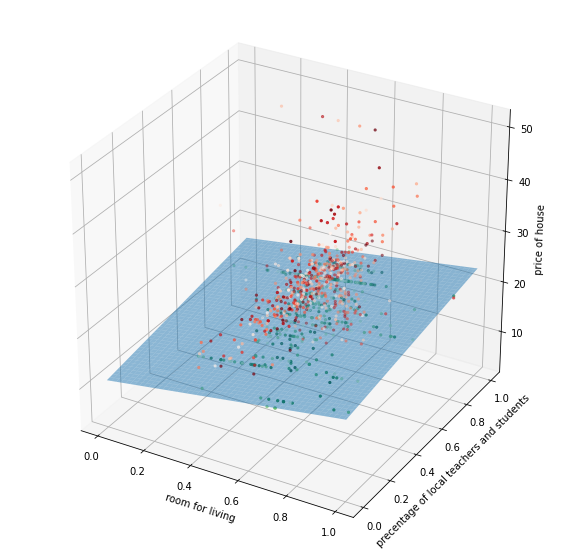

In [87]:
# x_data1
n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

# edge, face color, font 조절 etc
plt.rcParams['font.family'] = 'AppleGothic'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('room for living')
ax.set_ylabel('precentage of local teachers and students')
ax.set_zlabel('price of house')
ax.scatter(x_data1[:, 0], x_data1[:, 1], y_pred1, c=color, marker='o', s=5, cmap='Greens')
ax.scatter(x_data1[:, 0], x_data1[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = slopes1[0] * X + slopes1[1] * Y + b1
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)

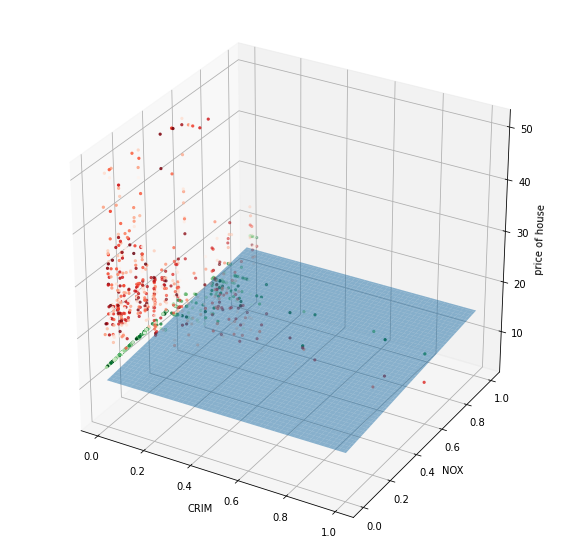

In [88]:
# x_data2
n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

# edge, face color, font 조절 etc
plt.rcParams['font.family'] = 'AppleGothic'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('CRIM')
ax.set_ylabel('NOX')
ax.set_zlabel('price of house')
ax.scatter(x_data2[:, 0], x_data2[:, 1], y_pred2, c=color, marker='o', s=5, cmap='Greens')
ax.scatter(x_data2[:, 0], x_data2[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = slopes2[0] * X + slopes2[1] * Y + b1
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)

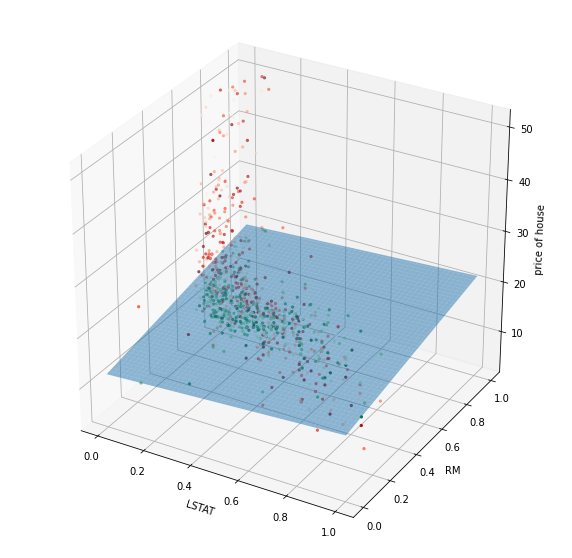

In [91]:
# x_data3

n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

# edge, face color, font 조절 etc
plt.rcParams['font.family'] = 'AppleGothic'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('price of house')
ax.scatter(x_data3[:, 0], x_data3[:, 1], y_pred3, c=color, marker='o', s=5, cmap='Greens')
ax.scatter(x_data3[:, 0], x_data3[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
Z = slopes3[0] * X + slopes3[1] * Y + b3
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)